# Summer Olympics Data Analysis Assignment

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("summerOlympics.csv")
df

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


### 1. In how many cities Summer Olympics is held so far?

In [4]:
cities = pd.unique(df['City'])
print(cities)

print("\n-----------------------------------------------------------")
print("Number of cities where Summer Olympics are held = ",len(cities))
print("-----------------------------------------------------------")


['Athens' 'Paris' 'St Louis' 'London' 'Stockholm' 'Antwerp' 'Amsterdam'
 'Los Angeles' 'Berlin' 'Helsinki' 'Melbourne / Stockholm' 'Rome' 'Tokyo'
 'Mexico' 'Munich' 'Montreal' 'Moscow' 'Seoul' 'Barcelona' 'Atlanta'
 'Sydney' 'Beijing']

-----------------------------------------------------------
Number of cities where Summer Olympics are held =  22
-----------------------------------------------------------


### 2. Which sport is having most number of Gold Medals so far? (Top 5)



Top 5 Sport having Highest number Gold Medal 

         Sport  No. of Gold Medals
0     Aquatics                1421
1    Athletics                1215
17      Rowing                 890
4   Gymnastics                 820
3      Fencing                 552


<AxesSubplot:title={'center':'Most Gold Medals won in Sport'}, xlabel='Sport', ylabel='No. of Gold Medals'>

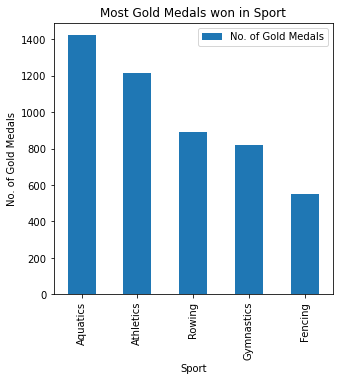

In [25]:
#Creating new dataframe for gold medal only
gold= df[df["Medal"]=="Gold"]                                              

data=[]

#Finding number of gold medals in each sports 
for sport in gold['Sport'].unique():                                       
  data.append([sport , len(gold[gold['Sport']  == sport])])

#Creating new dataframe of sport name and number of gold medal
gold = pd.DataFrame(data, columns=['Sport','No. of Gold Medals'])   

gold = gold.sort_values(by = 'No. of Gold Medals', ascending = False).head()

#Displaying the Top 5 Sport name and Number of Gold medals
print('\n')
print('Top 5 Sport having Highest number Gold Medal \n')
print(gold)                                                                     

#Plotting Bar graph 
#Sorting the dataframe and selecting only Top 5 Sports name
gold.plot(x = 'Sport', y = 'No. of Gold Medals', kind = 'bar' ,ylabel = 'No. of Gold Medals', figsize = (5,5), title = 'Most Gold Medals won in Sport')        

    
    



### 3. Which sport is having most number of medals so far? (Top 5)

         Sport  Medal
0     Aquatics   4170
1    Athletics   3638
17      Rowing   2667
4   Gymnastics   2307
3      Fencing   1613


<AxesSubplot:xlabel='Sport'>

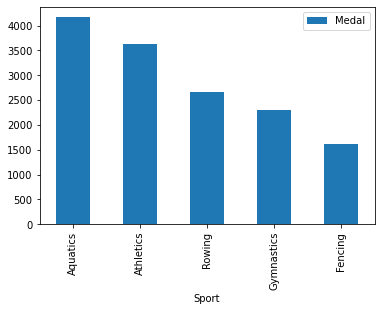

In [6]:
data=[]
for  Medal in df['Sport'].unique():
  data.append([Medal , len(df[df['Sport']  == Medal])])
data = pd.DataFrame(data,columns=['Sport','Medal'])
data = data.sort_values (by='Medal',ascending=False).head()
print(data)
data.plot(x='Sport',y='Medal',kind='bar')

### 4. Which player has won most number of medals? (Top 5)

In [26]:
data = []
for Medal in df['Athlete'].unique():
  data.append([Medal,len(df[df['Athlete']==Medal])])
data = pd.DataFrame(data,columns =['Athlete','No. of Medals'])
data = data.sort_values(by='Medal',ascending= False).head()
print(data)
data.plot(x='Athlete',y='Medal',kind='bar')


KeyError: 'Medal'

### 5. Which player has won most number Gold Medals of medals? (Top 5)

In [8]:
data=[]

for Gold in df['Athlete'].unique():
  data.append([Gold,len(df[df['Athlete']==Gold])])

data = pd.DataFrame(data,columns=['Athlete','Gold'])
data = data.sort_values(by='Gold',ascending = False).head()
print(data)

                    Athlete  Gold
18640       PHELPS, Michael    22
7197       LATYNINA, Larisa    18
9948     ANDRIANOV, Nikolay    15
6591           ONO, Takashi    13
5103   MANGIAROTTI, Edoardo    13


### 6. In which year India won first Gold Medal in Summer Olympics?

In [11]:
yr = df.loc[(df['Country'] == 'IND')&(df['Medal']=='Gold'),'Year'].values[0]

print("--------------------------------------------------------------------------")
print("The year in which India won first Gold Medal in Summer Olympics:=> ", yr)
print("--------------------------------------------------------------------------")

--------------------------------------------------------------------------
The year in which India won first Gold Medal in Summer Olympics:=>  1928
--------------------------------------------------------------------------


### 7. Which event is most popular in terms on number of players? (Top 5)

<AxesSubplot:xlabel='Event'>

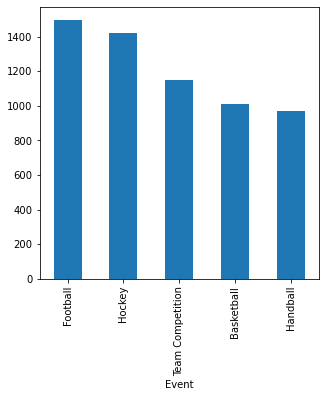

In [24]:
plt.subplots(figsize=(5, 5))
data = df.groupby('Event')['Athlete'].count().sort_values(ascending = False).head()
data.plot(x='Event',y='Athlete',kind='bar')

### 8. Which sport is having most female Gold Medalists? (Top 5)

,Sport,Most Female gold medalists
0,Aquatics,589
1,Athletics,389
2,Gymnastics,268
3,Rowing,217
4,Volleyball,166


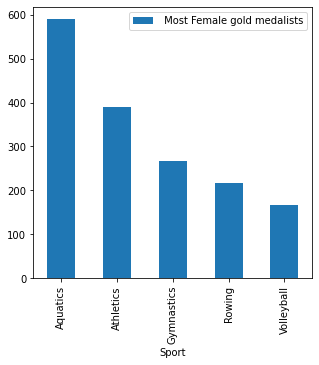

In [21]:
data = []

for female in df.loc[(df['Gender'] == 'Women') & (df['Medal'] == 'Gold'), 'Sport'].value_counts().items():
 data.append(female)

data=pd.DataFrame(data, columns = ['Sport', ' Most Female gold medalists']).sort_values(by = ' Most Female gold medalists', ascending = False).head()

data.plot(x = 'Sport', y = ' Most Female gold medalists', kind = 'bar', figsize = (5, 5))

data